In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
import nltk
from nltk.stem.snowball import SnowballStemmer
import regex as re
from nltk.tokenize import sent_tokenize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras import Sequential
from keras.layers import Embedding, Dense, LSTM
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
import nltk
from nltk.stem.snowball import SnowballStemmer
import regex as re
from nltk.tokenize import sent_tokenize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords


In [ ]:
#Downloading some packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import pandas as pd

#Reading datasets

dm_fake = pd.read_csv ("/content/Fake.csv")  # For macOS or Linux
dm_true = pd.read_csv ("/content/True.csv")

In [ ]:
dm_true.head()

,title,status,maximum_length
0,Obama says the Democratic nominee will be clea...,0,11
1,Prominent South Carolina congressman to endors...,0,10
2,Senators seek to block $1.15 billion U.S. arms...,0,12
3,Many Trump voters welcome U.S. air strikes as ...,0,11
4,‘Anti-Russia’ Escalation? Plans for New US Mar...,1,10


In [ ]:
dm_fake.head()

,title,status,maximum_length
0,Obama says the Democratic nominee will be clea...,0,11
1,Prominent South Carolina congressman to endors...,0,10
2,Senators seek to block $1.15 billion U.S. arms...,0,12
3,Many Trump voters welcome U.S. air strikes as ...,0,11
4,‘Anti-Russia’ Escalation? Plans for New US Mar...,1,10


In [ ]:
dm_true.columns

Index(['title', 'status', 'maximum_length'], dtype='object')

In [ ]:
#Labelling them seperately
#dm_true['status'] = 0
#dm_fake['status'] = 1

In [ ]:
# merge and remove unnecessary columns
df = pd.concat([dm_true,dm_fake])

#df.drop(['subject','text','date'],axis=1,inplace=True)

In [ ]:
#Since we are going to build model only based on the title feature, hence dropped text, date , subject.
random_indexes = np.random.randint(0,len(df),len(df))
df = df.iloc[random_indexes].reset_index(drop=True)

In [ ]:
#TEXT ANALYSIS
pd.set_option('display.max_colwidth', 500)
random = np.random.randint(0,len(df),20)
df.iloc[random]

,title,status,maximum_length
28513,"OBAMA STONEWALLING ON Why He Sent 13 Payments Of $99,999,999.99 To Iran…Where Was Congress?",1,14
4669,Arm found near Copenhagen could relate to submarine case: Danish police,0,11
22711,U.S. officials try to ease concerns Trump may quit Iran deal,0,11
26564,"In Brussels, Tillerson offers EU strong U.S. support",0,8
38033,"Preparing to Invade: US Deploys Additional 2,500 Soldiers for ‘Syria and Iraq’",1,12
8047,May Jobs Report And Unemployment Rate Bleak – Guess Who’s To Blame? (Hint: It’s Not Obama),1,16
19329,OBAMA’S OPEN BORDERS Crisis Just Got Real…WHO Warns Of “EXPLOSIVE SPREAD” Of Dangerous Virus [VIDEO],1,15
8592,"Trump Claims He Has Done More Against ISIS Than Obama, The Scorecard Says He Is Lying",1,16
8651,"MSNBC host leaving the Republican party, becoming an independent",0,9
35641,Soledad O’Brien SLAMS Media For Supporting White Supremacy (VIDEO),1,9


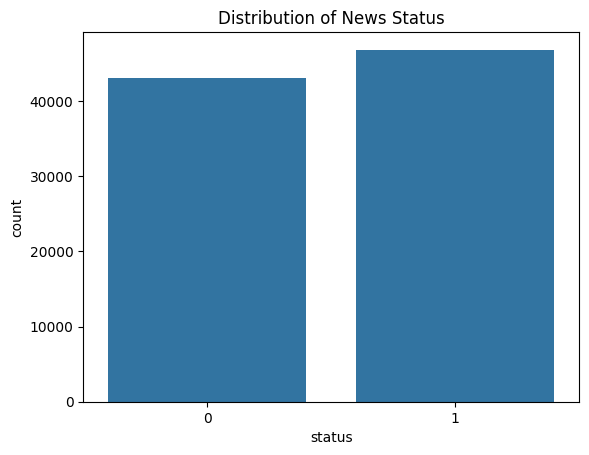

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'status' is a column with categories like 'fake' and 'real'
sns.countplot(x='status', data=df)
plt.title('Distribution of News Status')
plt.show()

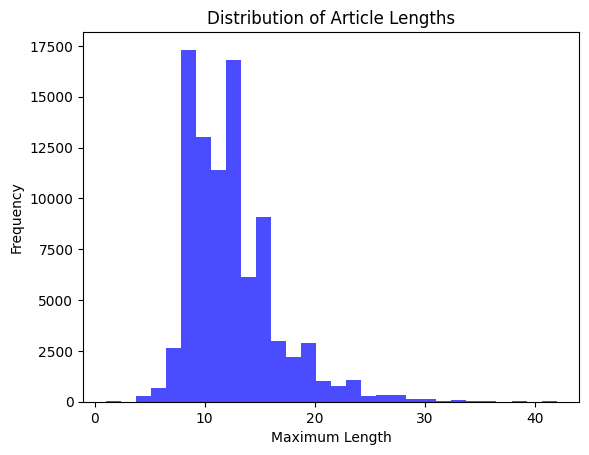

In [ ]:
plt.hist(df['maximum_length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Article Lengths')
plt.xlabel('Maximum Length')
plt.ylabel('Frequency')
plt.show()

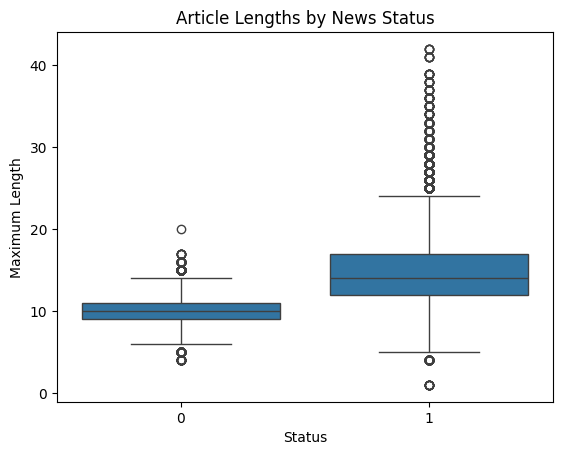

In [ ]:
sns.boxplot(x='status', y='maximum_length', data=df)
plt.title('Article Lengths by News Status')
plt.xlabel('Status')
plt.ylabel('Maximum Length')
plt.show()

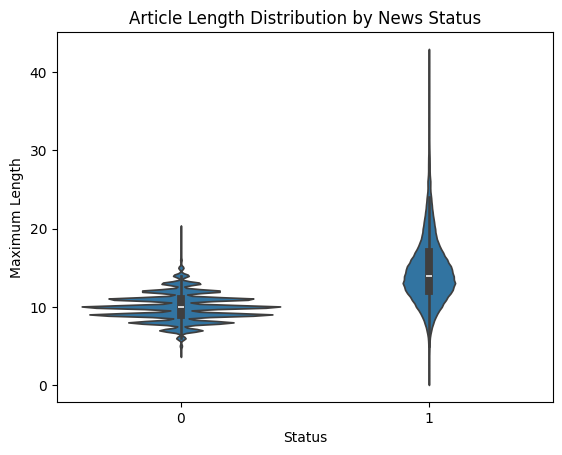

In [ ]:
sns.violinplot(x='status', y='maximum_length', data=df)
plt.title('Article Length Distribution by News Status')
plt.xlabel('Status')
plt.ylabel('Maximum Length')
plt.show()


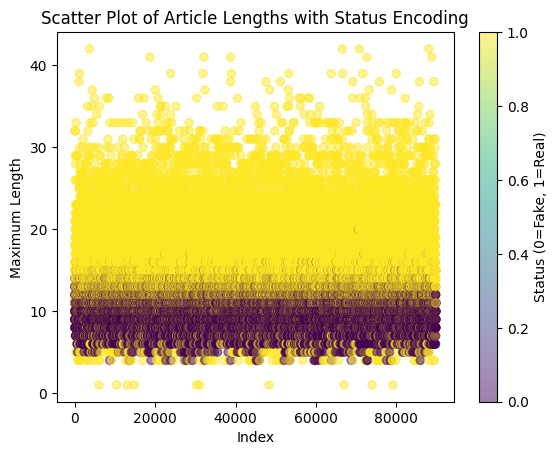

In [ ]:
# You need to numerically encode 'status' if it's categorical
df['status_code'] = df['status'].astype('category').cat.codes

plt.scatter(x=df.index, y='maximum_length', c='status_code', data=df, cmap='viridis', alpha=0.5)
plt.colorbar().set_label('Status (0=Fake, 1=Real)')
plt.title('Scatter Plot of Article Lengths with Status Encoding')
plt.xlabel('Index')
plt.ylabel('Maximum Length')
plt.show()


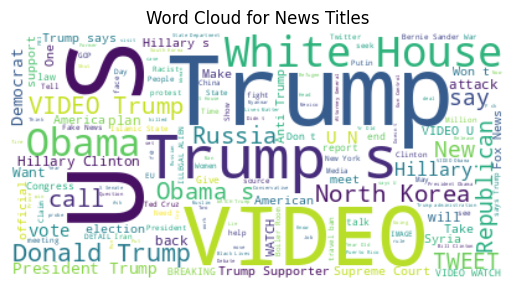

In [ ]:
from wordcloud import WordCloud

# Combine all titles into one large string
text = " ".join(title for title in df.title)

wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for News Titles')
plt.show()


In [ ]:
#work needs to be done on data before feeding to neural network-
#Remove punctuations eg ""
#Convert uppercase to lowercase
#No need to apply stemming, otherwise it will just shorten the word unnecessary
#Apply lemmatization
#Remove all the stopwords
#Finally make vocabulary after completion of 5 steps

In [ ]:
# Null values
df.isnull().sum()

title     0
status    0
dtype: int64

In [ ]:
# longest sentence length
def longest_sentence_length(text):
  return len(text.split())

df['maximum_length'] = df['title'].apply(lambda x : longest_sentence_length(x))
print('longest sentence having length -')
max_length = max(df['maximum_length'].values)
print(max_length)

longest sentence having length -
42


In [ ]:
# Text cleaning
text_cleaning = "\b0\S*|\b[^A-Za-z0-9]+"

def preprocess_filter(text, stem=False):
  text = re.sub(text_cleaning, " ",str(text.lower()).strip())
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        stemmer = SnowballStemmer(language='english')
        token = stemmer.stem(token)
      tokens.append(token)
  return " ".join(tokens)

In [ ]:
#The regular expression pattern removes non-alphanumeric characters and digits, enhancing text cleanliness for subsequent analysis.
#Text preprocessing function standardizes text by converting it to lowercase, removing stop words, and optionally applying stemming, facilitating effective natural language processing.
#Stemming simplifies words to their root forms, aiding in capturing underlying semantic meanings and improving search accuracy.
#Removal of stop words reduces noise in text data, focusing on informative words and enhancing the quality of subsequent analysis.

In [ ]:
# Word embedding with pre padding
def one_hot_encoded(text,vocab_size=5000,max_length = 40):
    hot_encoded = one_hot(text,vocab_size)
    return hot_encoded

In [ ]:
# word embedding pipeline
def word_embedding(text):
    preprocessed_text=preprocess_filter(text)
    return one_hot_encoded(preprocessed_text)

In [ ]:
# Creating NN Model
embedded_features = 40
model = Sequential()
model.add(Embedding(5000,embedded_features,input_length = 42))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer= 'adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 42, 40)            200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


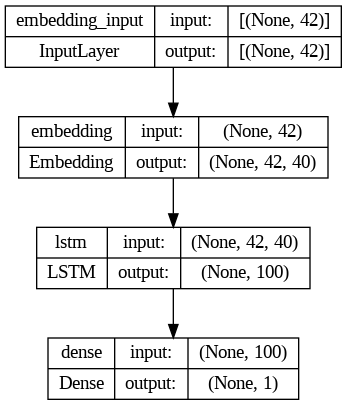

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming you have your model defined as 'model'
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#The model utilizes a vocabulary size of 5000, reflecting the extensive nature of the dataset and the need to handle a wide range of words effectively.
#By embedding input tokens into 40-dimensional vectors, the model captures nuanced semantic relationships, crucial for understanding the complex language patterns present in the dataset.
#Leveraging an LSTM layer with 100 units, the model effectively learns from the extensive sequential data, ensuring it captures long-term dependencies and context effectively.
#With a final dense layer employing a sigmoid activation function, the model delivers binary classification predictions, adeptly classifying the vast and varied dataset with accuracy.


In [ ]:
# One hot encoded title
one_hot_encoded_title =df['title'].apply(lambda x : word_embedding(x)).values

In [ ]:
# padding to make the size equal of the sequences
padded_encoded_title = pad_sequences(one_hot_encoded_title,maxlen=max_length,padding = 'pre')

In [ ]:
# Splitting
X = padded_encoded_title
y = df['status'].values
y = np.array(y)

# shapes
print(X.shape)
print(y.shape)

(89796, 42)
(89796,)


In [ ]:
# shape and size
print('X shape {}'.format(X.shape))
print('y shape {}'.format(y.shape))

X shape (89796, 42)
y shape (89796,)


In [ ]:
# Splitting into training, testing
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

# Shape and size of train and test dataset
print('X train shape {}'.format(X_train.shape))
print('X test shape {}'.format(X_test.shape))
print('y train shape {}'.format(y_train.shape))
print('y test shape {}'.format(y_test.shape))

X train shape (67347, 42)
X test shape (22449, 42)
y train shape (67347,)
y test shape (22449,)


In [ ]:
# Model training
# training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
1053/1053 [==============================] - 163s 145ms/step - loss: 0.1522 - accuracy: 0.9412 - val_loss: 0.0745 - val_accuracy: 0.9743
Epoch 2/15
1053/1053 [==============================] - 146s 139ms/step - loss: 0.0521 - accuracy: 0.9829 - val_loss: 0.0784 - val_accuracy: 0.9730
Epoch 3/15
1053/1053 [==============================] - 148s 141ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0428 - val_accuracy: 0.9879
Epoch 4/15
1053/1053 [==============================] - 135s 128ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0419 - val_accuracy: 0.9908
Epoch 5/15
1053/1053 [==============================] - 134s 127ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.0398 - val_accuracy: 0.9922
Epoch 6/15
1053/1053 [==============================] - 132s 125ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.0411 - val_accuracy: 0.9924
Epoch 7/15
1053/1053 [==============================] - 141s 134ms/step - loss: 0.0049 - accuracy: 0.9984 - val_

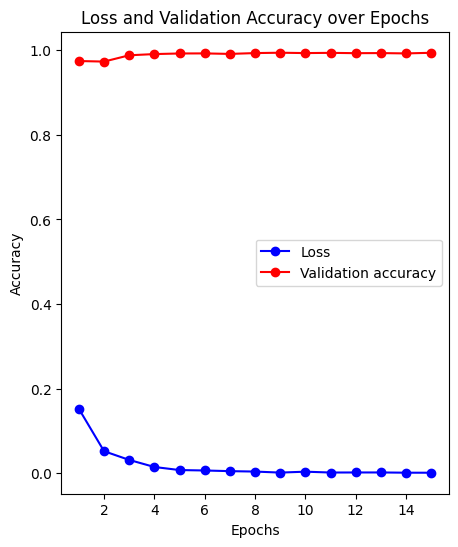

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by the 'fit' method
acc = history.history['loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(5, 6))
plt.plot(epochs, acc, 'bo-', label='Loss')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Loss and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
#Evaluation
# setting threshold value
def best_threshold_value(thresholds:list,X_test):
    accuracies = []
    for thresh in thresholds:
        ypred =model.predict(X_test)
        ypred = np.where(ypred> thresh,1,0)
        accuracies.append(accuracy_score(y_test,ypred))
    return pd.DataFrame({
        'Threshold': thresholds,
        'Accuracy' : accuracies
    })

In [ ]:
best_threshold_value([0.4,0.5,0.6,0.7,0.8,0.9], X_test)

351/351 [==============================] - 2s 4ms/step


,Threshold,Accuracy
0,0.4,0.970601
1,0.5,0.970780
2,0.6,0.971314
3,0.7,0.971581
4,0.8,0.971938
5,0.9,0.972739


In [ ]:
#Not much difference in accuray
#But the most suitable threshold value we have got is 0.4

In [ ]:
# Predictino value at threshold 0.4
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >0.4, 1, 0)

351/351 [==============================] - 2s 4ms/step


In [ ]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('----------------')
print('Classification report')
print(classification_report(y_pred,y_test))


Confusion matrix
[[5151  145]
 [ 185 5744]]
----------------
Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5296
           1       0.98      0.97      0.97      5929

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225



In [ ]:
#The model performs well in both classes, with high precision, recall, and F1-score, suggesting robustness in classification.
#There is no significant imbalance in performance between the two classes, as evidenced by similar metrics for both classes.
#The model's overall performance is excellent, achieving high accuracy on the dataset.


In [ ]:
#PREDICTIONS
# input generator
def prediction_input_processing(text):
    encoded = word_embedding(text)
    padded_encoded_title = pad_sequences([encoded],maxlen=max_length,padding = 'pre')
    output = model.predict(padded_encoded_title)
    output = np.where(0.4>output,1,0)
    if output[0][0] == 1:
        return 'Yes this News is fake'
    return 'No, It is not fake'


In [ ]:
# predictions
prediction_input_processing('Americans are more concerned over Indians fake open source contribution')


1/1 [==============================] - 0s 18ms/step


'Yes this News is fake'

In [ ]:
news = 'Trump Just Sent Michelle Obama a Bill She will Never Be able to pay in her lifetime'
prediction_input_processing(news)

1/1 [==============================] - 0s 16ms/step


'No, It is not fake'